# Chapter 3.4: How do you cross validate detection rates?

LA and Maricopa's detection rate estimated cases vs death rate estimated cases confirmed the two metrics, but a more honest test of accuracy would use death and case counts from a different county altogether. Choosing a conservative 20% average detection rate, I compared both estimates in Cook IL, Harrison TX, and Miami-Dade FL. If the estimations based on case count / detection rate and death count / death rate were reasonably similar, then I can conclude that both metrics yield fairly accurate estimations of COVID infections in these counties.

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from functions import calculate_infection, detection_plot, clean_deaths, clean_cases

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
deaths_df = clean_deaths(deaths_df)
cases_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

cases_df = clean_cases(cases_df)

cases_df_CK = cases_df.iloc[610,:]
cases_df_CK = cases_df_CK.reset_index()
deaths_df_CK = deaths_df.iloc[610,:]
deaths_df_CK = deaths_df_CK.reset_index()

index_val = len(deaths_df_CK.index)

calculate_infection(deaths_df_CK, index_val)

deaths_df_CK = deaths_df_CK[0:-18]
cases_df_CK['detection_cases'] = cases_df_CK[610] / 0.2
cases_df_CK = cases_df_CK[0:-18]

# Cook 

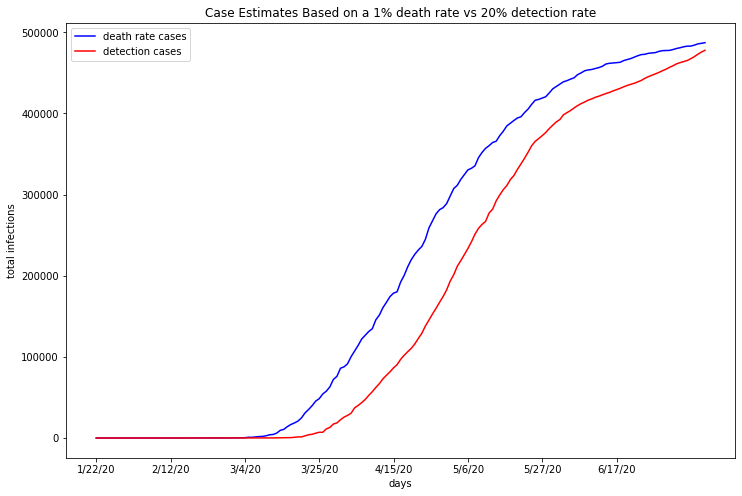

In [3]:
detection_plot(deaths_df_CK, cases_df_CK)

First, this graph is very compelling in validating both death rate and detection rate metrics. Both infection estimates within Cook County follow nearly parallel trajectories, with detection rate based estimates about 2 weeks behind the death rate. As aforementioned, case counts are generally inaccurate, underestimating the true infection numbers. Cook County may also be delayed in logging cases, as their healthcare system may have been overwhelmed due to an influx of COVID patients. Whichever estimate you examine, however, Cook County appears to have slowed their case rate down dramatically and is approaching approximately half a million infections. With a population of over five million people, if Cook caps their total cases at 500,000, they will have managed to only infect 1/10 of their population with COVID 19. 

In [4]:
cases_df_HR = cases_df.iloc[362,:]
cases_df_HR = cases_df_HR.reset_index()
deaths_df_HR = deaths_df.iloc[362,:]
deaths_df_HR = deaths_df_HR.reset_index()

index_val = len(deaths_df_HR.index)

calculate_infection(deaths_df_HR, index_val)

deaths_df_HR = deaths_df_HR[0:-18]
cases_df_HR['detection_cases'] = cases_df_HR[362] / 0.2
cases_df_HR = cases_df_HR[0:-18]

# Miami-Dade

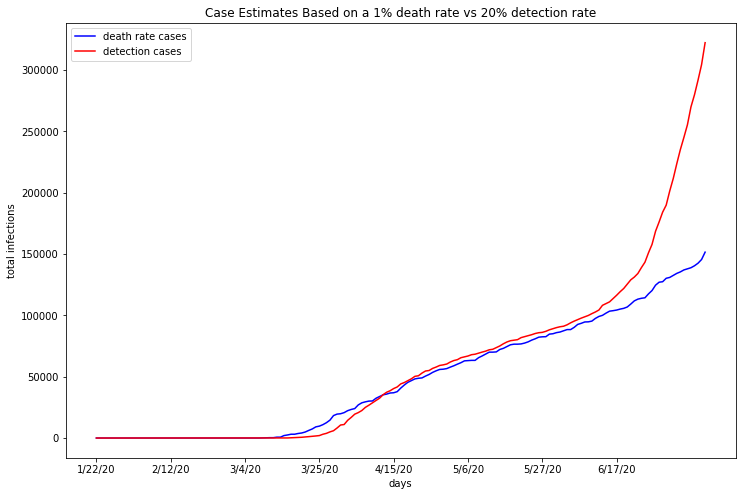

In [5]:
detection_plot(deaths_df_HR, cases_df_HR)

The very similar curves of Miami-Dade's infection estimates help validate both estimates and metrics used. Both estimates show an initial spike that nearly flattens, then rises again exponentially around mid June. After looking into Miami-Dade's COVID 19 policies over time, I found that in early June the county opened all entertainment venues, bars, city dog parks, gyms and fitness centers, and a limited number of beaches and pools. Such a wide scale reopening could explain the spike in infections two weeks later. 
Unlike Cook County, the detection rate based estimate surpasses death rate estimates in early April, rising substantially higher in the most recent estimates. This could be due to more wide spread COVID 19 testing, or lower accuracy in death reporting. 

In [6]:
cases_df_RS = cases_df.iloc[218,:]
cases_df_RS = cases_df_RS.reset_index()
deaths_df_RS = deaths_df.iloc[218,:]
deaths_df_RS = deaths_df_RS.reset_index()

index_val = len(deaths_df_RS.index)

calculate_infection(deaths_df_RS, index_val)

deaths_df_RS = deaths_df_RS[0:-18]
cases_df_RS['detection_cases'] = cases_df_RS[218] / 0.2
cases_df_RS = cases_df_RS[0:-18]

# Riverside

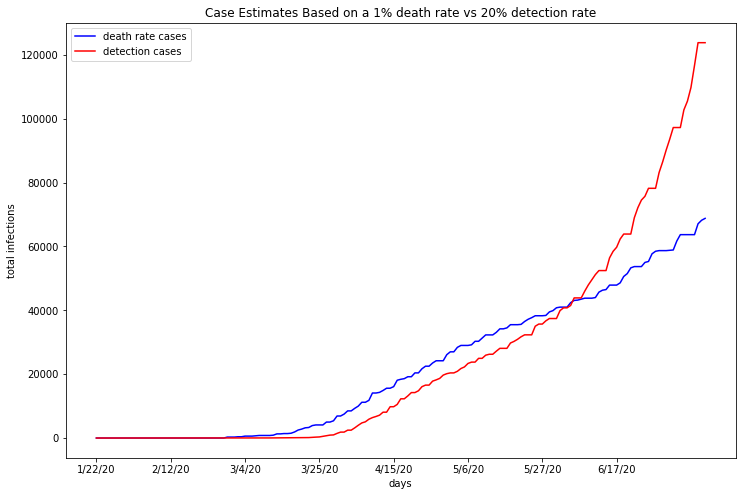

In [7]:
detection_plot(deaths_df_RS, cases_df_RS)

Like Cook County, Riverside's death rate based estimates are about 2 weeks behind detection rate based estimates. Similar to Maricopa County, those estimates cross over each other around early June, as the death rate estimate rises exponentially and the detection rate estimate continues linearly. As stated previously, any infection estimate based on a the confirmed case count is subject to the inaccuracies intrinsic to the nature of case count reports. Moving forward, as more tests become available, this metric will approach the true number of infections. Early estimates that involve confirmed cases, however, are likely to be lower than the true count.  

As you can see, the plots of both infection estimates for Cook, Miami-Dade, and Riverside follow similar curves and trajectories. While detection rate is calculated using death rate, each metric was applied to an independent variable and still yielded remarkably similar graphs. This sort of 'cross-referencing' of metrics confirms both methods as a means of estimated true infection counts. 